# K-fold CV — Hyper-parameter tuning in Python

## Introducción

En el último artículo ya explicamos la idea de K-fold CV; hoy vamos a ver cómo implementarla en Python. En particular, nos centraremos en el ajuste de hiperparámetros, no en la estimación del rendimiento del modelo. Empecemos.

## Explicación paso a paso

En este ejemplo utilizaremos el conjunto de datos de Indice de Felicidad para paises: https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?resource=download&select=report_2018-2019.csv

## Acerca de los datos: 
Este estudio analiza la asociación entre la Puntuación del Índice de Felicidad en 2018 y 2019, y un conjunto de variables independientes como 'Rango general', 'PIB per cápita', 'Apoyo social', 'Esperanza de vida saludable', 'Libertad para tomar decisiones vitales', 'Generosidad' y 'Percepción de la corrupción'. El objetivo de este estudio es investigar el impacto de estas variables independientes en el nivel de felicidad de los individuos durante estos dos años. Además, se realizó un análisis por países para examinar las variaciones de las variables entre el país más feliz del ranking y la India. Se emplearon múltiples visualizaciones para identificar e ilustrar estas diferencias de forma clara y concisa.

## Variables dependientes e independientes: 
La primera variable independiente es el PIB per cápita, que representa el bienestar económico de los residentes de un país. La segunda variable, la libertad para tomar decisiones en la vida, representa el nivel de autonomía y control que tienen los individuos sobre sus vidas. La tercera variable, la esperanza de vida con buena salud, indica el tiempo que los individuos pueden esperar vivir con buena salud. La cuarta variable, percepción de la corrupción, refleja hasta qué punto se percibe que la corrupción prevalece en una sociedad. Por último, la quinta variable, el apoyo social, mide hasta qué punto las personas tienen acceso al apoyo de la familia, los amigos y otras redes sociales.

Al examinar la relación entre estas variables independientes y la puntuación del Índice de Felicidad, el estudio pretende contribuir a la comprensión de los factores que influyen en los niveles de felicidad de los individuos. Los resultados de este estudio podrían ser útiles para los responsables políticos y otras partes interesadas a la hora de identificar áreas de intervención y mejora para aumentar el bienestar general de la población.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("../Datas/Happiness_Index_report_2018-2019.csv",delimiter=",",skiprows=8)

In [2]:
data

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


Acá por ahora no va a importar la variable `Country or region` ni tampoco `Overall rank`

In [3]:
data=data.drop(columns=["Overall rank","Country or region"])

In [4]:
data

,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...
307,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


La idea es predecir `Score` en términos de las demás variables independientes...

## K-Fold Cross Validation approach.

En este artículo explicaré la validación cruzada de pliegues K, que se utiliza principalmente para el ajuste de hiperparámetros. La validación cruzada es una técnica para evaluar modelos predictivos dividiendo la muestra original en un conjunto de entrenamiento para entrenar el modelo y un conjunto de prueba para evaluarlo. Explicaré la validación cruzada k-fold en pasos.

![image](https://i.stack.imgur.com/LyHIm.png)

1. Dividir el conjunto de datos en k particiones iguales
2. Utilice el primer pliegue como datos de prueba y la unión de los otros pliegues como datos de entrenamiento y calcule la precisión de la prueba
3. Repita los pasos 1 y 2. Utilice diferentes conjuntos como datos de prueba diferentes veces. Es decir, si dividimos el conjunto de datos en k pliegues. En la primera iteración, el primer pliegue serán los datos de prueba y la unión del resto serán los datos de entrenamiento. Entonces calcularemos la precisión de la prueba. En la siguiente iteración, el segundo pliegue serán los datos de prueba y la unión del resto serán los datos de entrenamiento. Del mismo modo, vamos a hacer para todos los pliegues.
Tome el promedio de estos precisión de la prueba como la precisión de la muestra.

Ahora ya has entendido cómo funciona la validación cruzada de K pliegues. El valor típico que tomaremos para K es 10. Es decir, 10 pliegues de validación cruzada.

Gracias a python! sklearn ha implementado maravillosamente cross_val_score para resolver nuestro problema. Son sólo unas pocas líneas de código. 

In [5]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score

In [6]:
rs=137
labels = data['Score']
features=data.drop(columns=['Score'])
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = rs)
val_features, test_features2, val_labels, test_labels2 = train_test_split(features, labels, test_size = 0.45, random_state = rs)

In [7]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
rfm = RandomForestRegressor(random_state = rs)
rfm.fit(train_features, train_labels)
y_pred = rfm.predict(train_features)
acc = r2_score(y_pred, train_labels)
acc

0.9681795107131245

In [8]:
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 17)

In [9]:
val_scores = cross_val_score(estimator=rfm,  X=train_features, y=train_labels, cv=10)
val_scores

array([0.8550488 , 0.57921694, 0.87732511, 0.87434081, 0.85174871,
       0.8260755 , 0.54072649, 0.77230223, 0.85978367, 0.70886568])

In [10]:
val_scores.mean()

0.7745433929639874

## Cross validation & Hyperparameters Tuning
Un hiperparámetro es un parámetro del modelo (es decir, un componente) que define una parte de la arquitectura del modelo de aprendizaje automático e influye en los valores de otros parámetros (por ejemplo, coeficientes o pesos). Los hiperparámetros se establecen antes de entrenar el modelo, mientras que los parámetros se aprenden para el modelo durante el entrenamiento.

La selección y el ajuste de los hiperparámetros pueden parecer un misterio, y establecer hiperparámetros puede parecer una elección arbitraria al iniciarse en el aprendizaje automático. Sin embargo, los hiperparámetros tienen un impacto significativo en el rendimiento de un modelo de aprendizaje automático, y existen estrategias para seleccionar y optimizar buenos valores de hiperparámetros.

El ajuste de hiperparámetros es un arte... posiblemente un arte oscuro.

![image](https://community.alteryx.com/t5/image/serverpage/image-id/74545i97245FDAA10376E9?v=v2)

### Developing Random Forest (and others) algorithms to predict...

In [11]:
rs=137
def make_RF(pr=True,plot2=True,ML="RF"):
    verv=2
#===========================================================================================================MACHINE LEARNING REGRESSORS============================
    if ML=="RF":
        rf_param_grid = {
            'n_estimators':[100, 200, 400, 600, 800, 1000],
            'max_depth': [None, 10, 15, 20, 25, 30]}
        rfm = RandomForestRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = RandomForestRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)

    if ML=="GB":
        rf_param_grid = {
            'n_estimators':[200, 400, 600, 800, 1000],
            'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.5],
            'max_depth': [10, 15, 20, 25, 30]}
        rfm = GradientBoostingRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = GradientBoostingRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)

    if ML=="AB":
        rf_param_grid = {
            'n_estimators':[200, 400, 600, 800, 1000],
            'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.5]}
        rfm = AdaBoostRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = AdaBoostRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)

    if ML=="ET":
        rf_param_grid = {
            'n_estimators':[200, 400, 600, 800, 1000],
            'max_depth': [10, 15, 20, 25, 30]}
        rfm = ExtraTreesRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = ExtraTreesRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)
#==================================================================================================================================================================

    # Use the Machine learning algorithm predict method on the test data
    train_predictions = rf.predict(train_features)
    test_predictions = rf.predict(test_features)
    validation_predictions = rf.predict(val_features)
    all_predictions = rf.predict(features)
    # Calculate the absolute and square errors
    
    # Get numerical feature importances
    importances = rf.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances["Importances_CUMSUM"]=feature_importances["Importances"].cumsum()
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(mean_absolute_error(all_predictions,labels), 4))
        # Print out the root mean square error (rmse)
        print('Root Mean Square Error (RMSE):', round(np.sqrt(mean_squared_error(all_predictions,labels)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(all_predictions,labels), 4))
        # Print out the r2_score
        print('R2-score:', round(r2_score(all_predictions,labels), 4))
        # Print out the correlation coefficient
        print('Correlation coeficient:', round(np.corrcoef(all_predictions,labels)[0][1], 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b", alpha=0.5)
        plt.xlabel("Importances (%)",fontsize=15); plt.xticks(fontsize=15); plt.yticks(fontsize=15);
        plt.legend(ncol=2, loc="lower right", frameon=True); plt.grid();
        plt.subplot(122)
        plt.scatter(val_labels,validation_predictions,color='k',s=80,marker='^', facecolors='none', label="Validation dataset")
        plt.scatter(train_labels,train_predictions,color='b',s=40,marker='o', facecolors='none', label="Train dataset")
        plt.scatter(test_labels,test_predictions,color='r',s=40,marker='s', facecolors='none', label="Test dataset")
        #plt.scatter(labels,all_predictions,color='k',s=40,marker='P', facecolors='none', label="All dataset")
        #plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15); plt.ylabel("Predictions",fontsize=15); plt.xticks(fontsize=15); plt.yticks(fontsize=15);
        plt.legend(fontsize=15,ncol=1,loc="lower right",frameon=True); plt.grid();
        plt.show()
    return feature_importances[feature_importances["Importances"]>0], train_predictions, train_labels, test_predictions, test_labels, validation_predictions, val_labels, all_predictions, labels

## Ahora vamos a realizar el modelo...

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=400; total time=   0.4s
[CV] END ...................max_depth=None, n_e

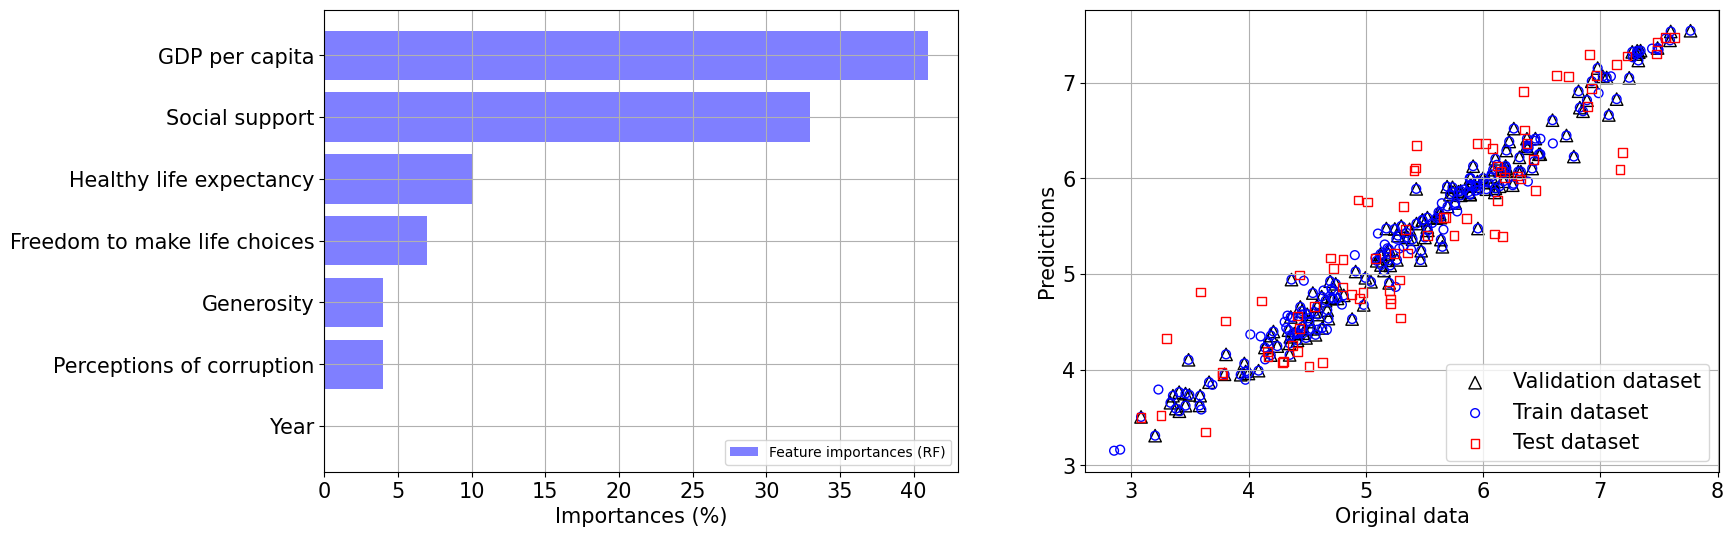

In [12]:
Resultados_RF=make_RF(pr=True,plot2=True,ML="RF")